# Altair

- Very new
- Very shinny
- Could be the new bokeh...

In [3]:
!pip install -U altair==2.4.1 vega_datasets vega==1.3  
# Then restart notebook

Requirement already up-to-date: altair==2.4.1 in /Users/paul/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages (2.4.1)
Requirement already up-to-date: vega_datasets in /Users/paul/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages (0.7.0)
Requirement already up-to-date: vega==1.3 in /Users/paul/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages (1.3.0)


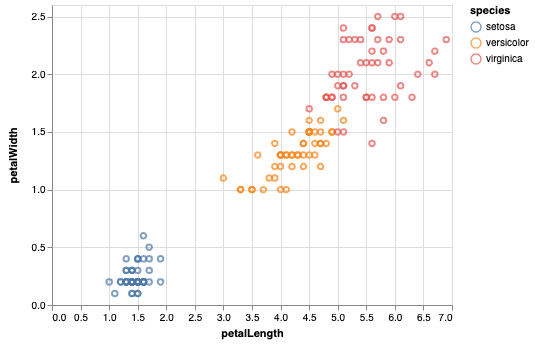

In [2]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

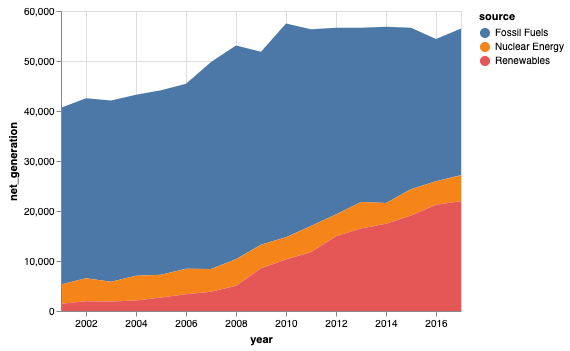

In [4]:
import altair as alt
from vega_datasets import data

source = data.iowa_electricity()

alt.Chart(source).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

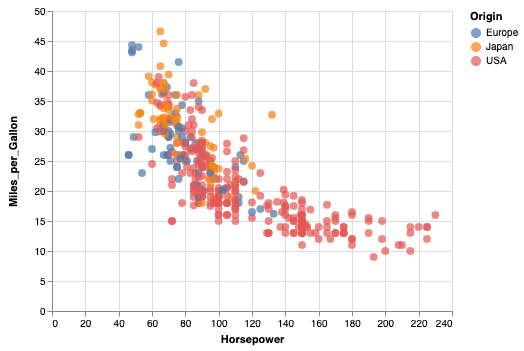

In [5]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

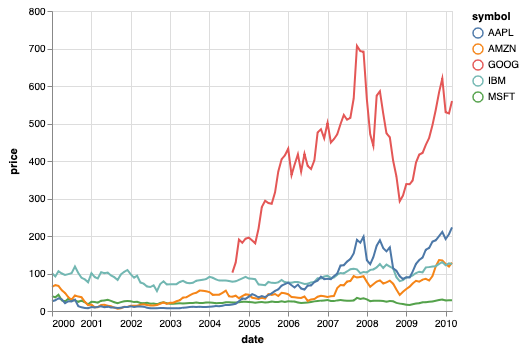

In [8]:
import altair as alt
from vega_datasets import data

source = data.stocks()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

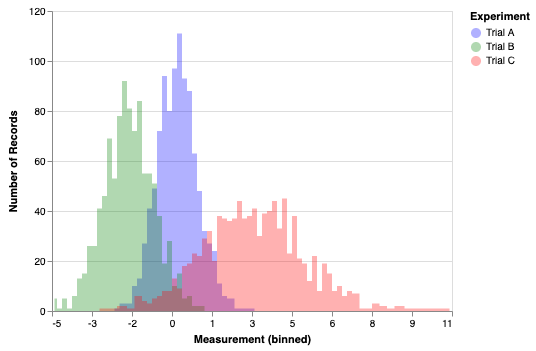

In [9]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Trial A': np.random.normal(0, 0.8, 1000),
                   'Trial B': np.random.normal(-2, 1, 1000),
                   'Trial C': np.random.normal(3, 2, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Experiment',
    value_name='Measurement'
)

alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Experiment',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000'])
    )
)

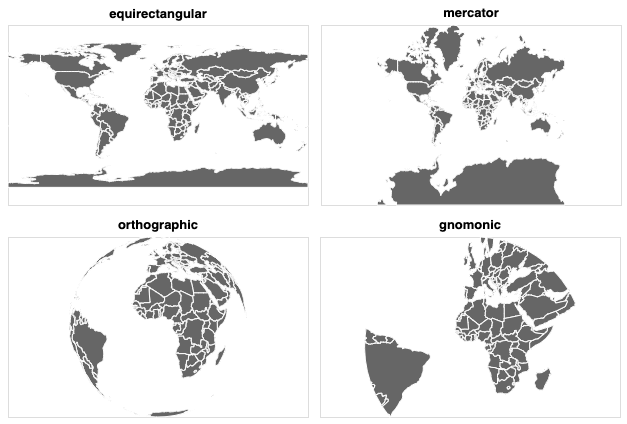

In [10]:
import altair as alt
from vega_datasets import data

source = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=300,
    height=180
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj)
          for proj in projections]

alt.vconcat(
    alt.hconcat(*charts[:2]),
    alt.hconcat(*charts[2:])
)

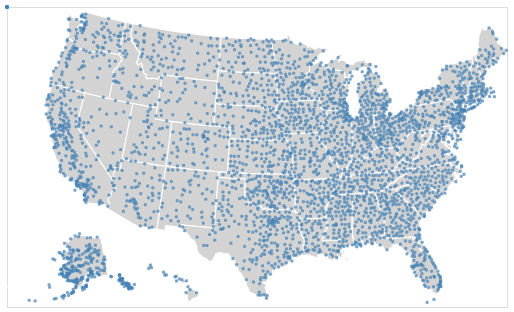

In [16]:
import altair as alt
from vega_datasets import data

airports = data.airports()
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# airport positions on background
points = alt.Chart(airports).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size=alt.value(10),
    color=alt.value('steelblue')
)

background + points